# CanYouCatchIt?
A web application allowing you to obtain the percentage of chance that your bus/tram/metro is late. 💻🤖🎲🚌 🚎🚇🔮

_Build with the STIB API (available [here](https://opendata.stib-mivb.be/store/))_

# Notes: Making some models 💻🤖🚌 🚎🚇
We are here to make some machine learning models

## Load the data

In [2]:
import pandas as pd

DELAY_PATH = '/home/haeresis/Documents/Github/CanYouCatchIt/machine_learning/data'

def load_delay_data(delay_path=DELAY_PATH):
    """
    Load the cvs file in a panda dataframe
    """
    csv_path = os.path.join(delay_path, "delay2020-11-03.csv")
    return pd.read_csv(csv_path)

## Take a Quick Look at the Data Structure

In [3]:
# load the csv file
delay = load_delay_data()
# display the head
delay.head()

,transport_type,stop,line,delay,theoretical_time,expectedArrivalTime,date,direction,year,month,day,hour,minute,seconds,temp,humidity,visibility,wind,rain
0,0,0089,39,NaN,NaN,NaN,2020-11-03 00:00:55.299968,NaN,2020,11,1,0,0,55,283.54,81,10000,5.7,0
1,0,0089,44,NaN,NaN,NaN,2020-11-03 00:00:55.300394,NaN,2020,11,1,0,0,55,283.54,81,10000,5.7,0
2,0,6608G,51,NaN,NaN,NaN,2020-11-03 00:00:57.848581,NaN,2020,11,1,0,0,57,283.54,81,10000,5.7,0
3,0,6608G,82,NaN,NaN,NaN,2020-11-03 00:00:59.555330,NaN,2020,11,1,0,0,59,283.54,81,10000,5.7,0
4,0,0089,39,NaN,NaN,NaN,2020-11-03 00:02:01.042762,NaN,2020,11,1,0,2,1,283.54,81,10000,5.7,0


In [4]:
delay.tail()

,transport_type,stop,line,delay,theoretical_time,expectedArrivalTime,date,direction,year,month,day,hour,minute,seconds,temp,humidity,visibility,wind,rain
5017,0,6608G,82,NaN,NaN,NaN,2020-11-03 23:57:53.353038,NaN,2020,11,1,23,57,53,279.56,87,10000,4.6,0
5018,0,0089,39,NaN,NaN,NaN,2020-11-03 23:58:55.025990,NaN,2020,11,1,23,58,55,279.56,87,10000,4.6,0
5019,0,0089,44,NaN,NaN,NaN,2020-11-03 23:58:55.949189,NaN,2020,11,1,23,58,55,279.56,87,10000,4.6,0
5020,0,6608G,51,NaN,NaN,NaN,2020-11-03 23:58:58.693877,NaN,2020,11,1,23,58,58,279.56,87,10000,4.6,0
5021,0,6608G,82,NaN,NaN,NaN,2020-11-03 23:59:00.539493,NaN,2020,11,1,23,59,0,279.56,87,10000,4.6,0


In [5]:
# display some information
delay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5022 entries, 0 to 5021
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   transport_type       5022 non-null   int64  
 1   stop                 5022 non-null   object 
 2   line                 5022 non-null   int64  
 3   delay                3861 non-null   float64
 4   theoretical_time     3861 non-null   object 
 5   expectedArrivalTime  3861 non-null   object 
 6   date                 5022 non-null   object 
 7   direction            3861 non-null   float64
 8   year                 5022 non-null   int64  
 9   month                5022 non-null   int64  
 10  day                  5022 non-null   int64  
 11  hour                 5022 non-null   int64  
 12  minute               5022 non-null   int64  
 13  seconds              5022 non-null   int64  
 14  temp                 5022 non-null   float64
 15  humidity             5022 non-null   i

In [6]:
# count the values
delay["delay"].value_counts()

 0.0     767
 1.0     435
-1.0     384
-2.0     307
 2.0     182
-3.0     179
 3.0     164
-4.0     162
 4.0     110
-5.0     106
-7.0      93
-8.0      92
-6.0      80
-11.0     77
-10.0     74
 5.0      72
 6.0      62
-12.0     55
-9.0      45
-15.0     41
-13.0     36
 8.0      33
-14.0     32
 7.0      29
-16.0     26
 13.0     24
 9.0      22
-17.0     14
-20.0     14
-19.0     13
 10.0     13
 12.0     13
 11.0     12
 14.0     12
-21.0     12
 20.0     11
-18.0      7
-23.0      7
 19.0      5
-27.0      5
-28.0      5
-34.0      4
 15.0      4
-29.0      3
 16.0      3
-22.0      3
-24.0      3
-35.0      3
 17.0      2
-26.0      2
 21.0      1
 18.0      1
Name: delay, dtype: int64

In [7]:
delay.describe()

,transport_type,line,delay,direction,year,month,day,hour,minute,seconds,temp,humidity,visibility,wind,rain
count,5022.0,5022.000000,3861.000000,3861.000000,5022.0,5022.0,5022.0,5022.000000,5022.000000,5022.000000,5022.000000,5022.000000,5022.0,5022.000000,5022.0
mean,0.0,54.015333,-1.749288,0.500907,2020.0,11.0,1.0,11.688570,29.581442,29.599363,282.241784,77.120470,10000.0,6.067264,0.0
std,0.0,16.690845,6.213167,0.500064,0.0,0.0,0.0,6.946619,17.276540,17.519738,1.742531,9.135966,0.0,2.043604,0.0
min,0.0,39.000000,-35.000000,0.000000,2020.0,11.0,1.0,0.000000,0.000000,0.000000,279.560000,62.000000,10000.0,3.100000,0.0
25%,0.0,44.000000,-4.000000,0.000000,2020.0,11.0,1.0,6.000000,15.000000,14.000000,280.630000,70.000000,10000.0,4.600000,0.0
50%,0.0,51.000000,0.000000,1.000000,2020.0,11.0,1.0,12.000000,30.000000,30.000000,282.130000,81.000000,10000.0,6.200000,0.0
75%,0.0,51.000000,1.000000,1.000000,2020.0,11.0,1.0,18.000000,45.000000,45.000000,283.540000,87.000000,10000.0,7.200000,0.0
max,0.0,82.000000,21.000000,1.000000,2020.0,11.0,1.0,23.000000,59.000000,59.000000,285.190000,93.000000,10000.0,11.300000,0.0


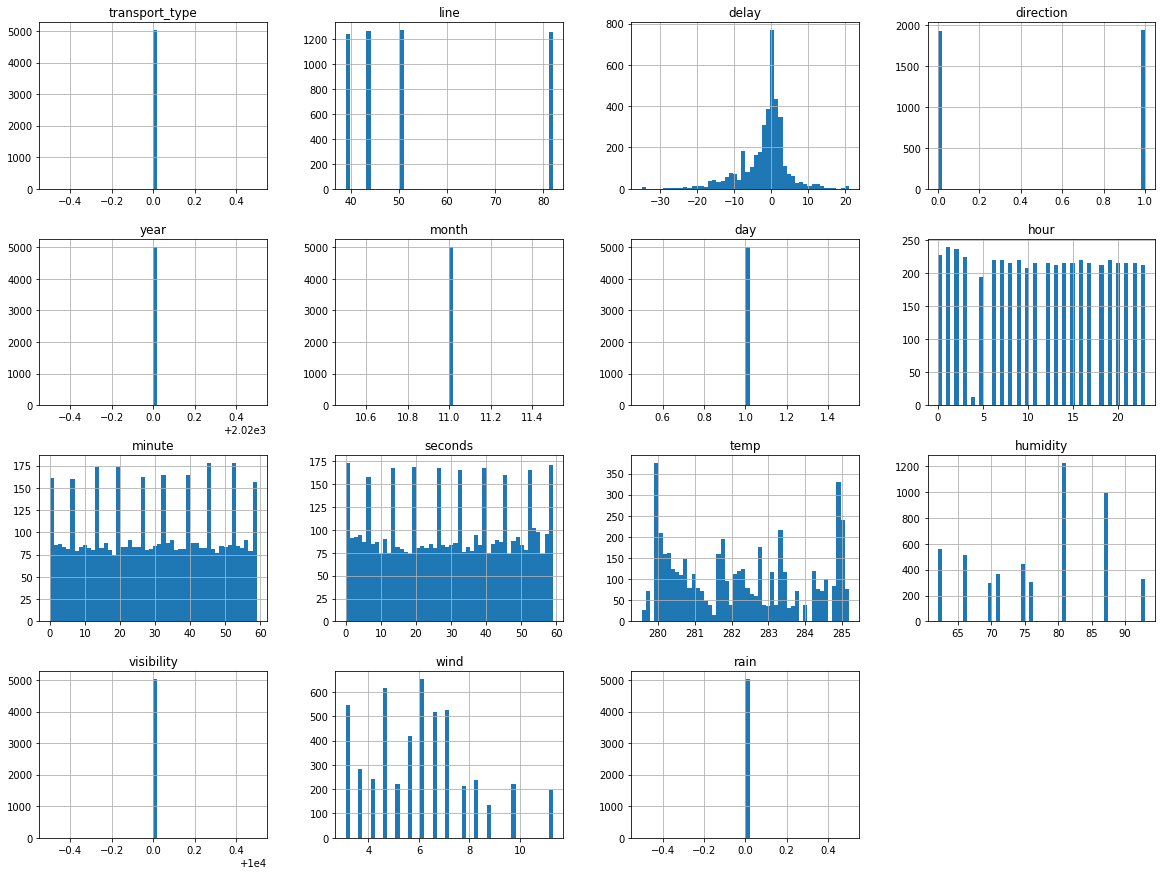

In [8]:
%matplotlib inline
# only in a Jupyter notebook column="delay"

# plot the data
import matplotlib.pyplot as plt
delay.hist(bins=50, figsize=(20,15))
plt.show()

### Create A Test Set

In [9]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(delay, test_size=0.2, random_state=42)

In [10]:
from sklearn.model_selection import StratifiedShuffleSplit

# Stratifie the data with the different line
# This make sure that the representation of each line is the same in the train set then in the overall dataset
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(delay, delay["stop"]):
    strat_train_set = delay.loc[train_index]
    strat_test_set = delay.loc[test_index]

In [11]:
# Display the representation of each line in the dataset
delay["stop"].value_counts() / len(delay)

6608G    0.50219
0089     0.49781
Name: stop, dtype: float64

### Discover and Visualize the Data to Gain Insights

In [12]:
delay = strat_train_set.copy()

#### Visualizing Time Data

<AxesSubplot:xlabel='hour', ylabel='delay'>

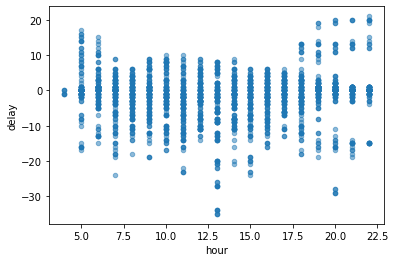

In [13]:
# display all the delay mesured by the hour of the day
delay.plot(kind="scatter", x="hour", y="delay", alpha=0.5)

<AxesSubplot:title={'center':'Mean delay per hour'}, xlabel='hour'>

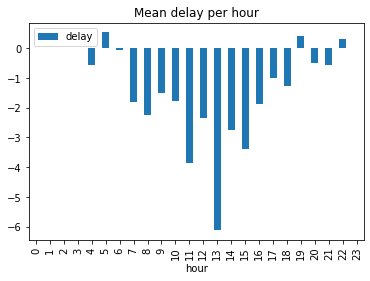

In [17]:
# Display the mean delay based on the hour of the day
delay.groupby("hour").mean().plot(y="delay", kind="bar", title="Mean delay per hour")

<AxesSubplot:xlabel='hour'>

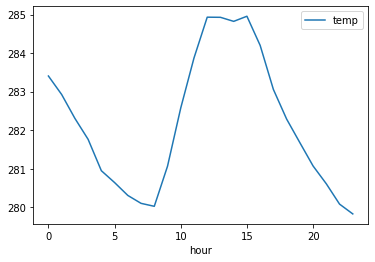

In [15]:
# Display the mean temperature based on the hour of the day
delay.groupby("hour").mean().plot(kind="line", y="temp")